# Assignment 4 - Simulation - Supporting Python Code

Steve Desilets

August 13, 2023

#### Question 1A

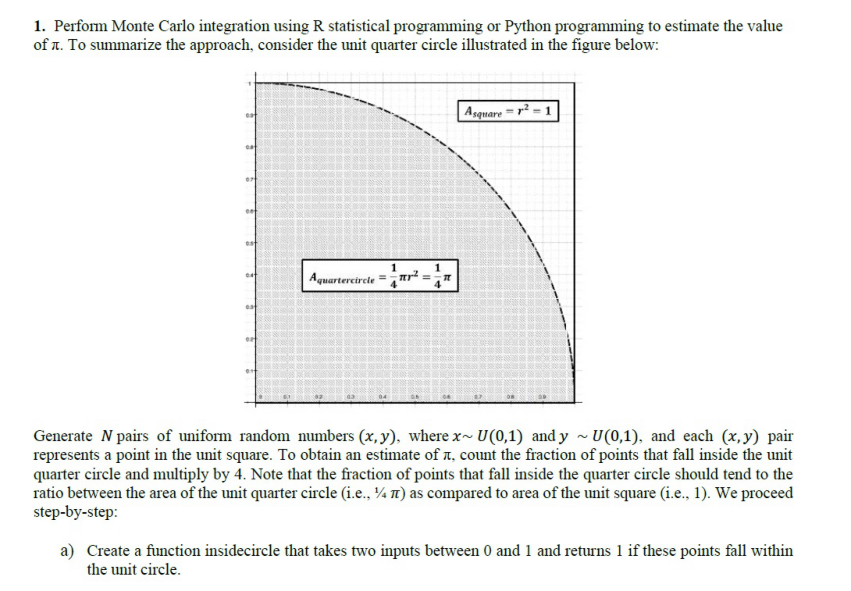

In [1]:
import matplotlib.pyplot as plt

plt.figure(figsize = (15,15))
question = plt.imread('Question_1A_Screenshot.jpg')
plt.imshow(question)
plt.axis("off")
plt.show()

#### Answer

In [63]:
# Let's create a function as prescribed in the directions

def insidecircle(x, y):                
    if (x**2) + (y**2) < 1:
        return(1)
    else:
        return(0)

#### Question 1B

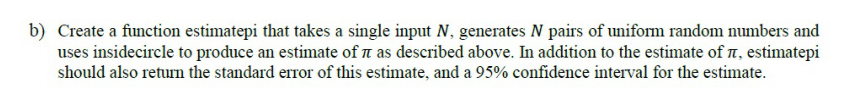

In [2]:
plt.figure(figsize = (15,15))
question = plt.imread('Question_1B_Screenshot.jpg')
plt.imshow(question)
plt.axis("off")
plt.show()

#### Answer

In [193]:
# Let's create a function as prescribed in the directions

# For this function, we need to apply some knowledge of geometry.

# We know that the area of one fourth of the unit circle is pi/4.

# We also know that the area of the square between (0,0) and (1,1) is 1.

# The ratio of the area of one fourth of the unit circle to the area of this square is therefore equal to pi/4.

# The ratio of the area of one fourth of the unit circle to the area of the square is also going to equal the sum of 
# in_circle_list divided by N.

# If we multiply the the figure described above by 4, then we will arrive at an estimate for pi.

from random import uniform
from statistics import stdev

in_circle_list = []

def estimatepi(N):
    for i in range(1, N+ 1):
        x = uniform(0,1)
        y = uniform(0,1)
        in_circle_list.append(insidecircle(x, y))
        
    pi_estimate = 4 * sum(in_circle_list) / N    
    print(f"The estimate for pi is {pi_estimate}.")
    
    p = sum(in_circle_list) / N
    q = 1 - p

    pi_standard_error = 4 * ( ( (p * q) / N)**0.5)

    ci_95_percent = (pi_estimate - (1.96 * pi_standard_error), pi_estimate + (1.96 * pi_standard_error))
    
    ci_width = ci_95_percent[1] - ci_95_percent[0]
            
    print(f"The standard error of the estimate for pi is {pi_standard_error}.") 
    print(f"The 95% confidence interval for the estimate of pi is {ci_95_percent}.")
    print(f"The width of the confidence interval is {ci_width}.")
    return(pi_estimate)


#### Question 1C

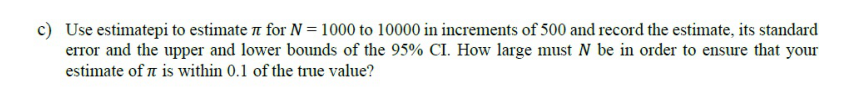

In [3]:
plt.figure(figsize = (15,15))
question = plt.imread('Question_1C_Screenshot.jpg')
plt.imshow(question)
plt.axis("off")
plt.show()

#### Answer

In [213]:

n_list = []

for i in range(1, 20):
    n_list.append(500*i + 500)
    
for j in n_list:
    in_circle_list = []
    print(f"Results When Number Of Trials Equals {j}:")
    estimatepi(j)
    print(f" ")

Results When Number Of Trials Equals 1000:
The estimate for pi is 3.14.
The standard error of the estimate for pi is 0.051965373086315846.
The 95% confidence interval for the estimate of pi is (3.038147868750821, 3.2418521312491793).
The width of the confidence interval is 0.20370426249835827.
 
Results When Number Of Trials Equals 1500:
The estimate for pi is 3.1333333333333333.
The standard error of the estimate for pi is 0.04254844733207512.
The 95% confidence interval for the estimate of pi is (3.049938376562466, 3.2167282901042005).
The width of the confidence interval is 0.16678991354173434.
 
Results When Number Of Trials Equals 2000:
The estimate for pi is 3.196.
The standard error of the estimate for pi is 0.03584399531302279.
The 95% confidence interval for the estimate of pi is (3.1257457691864756, 3.2662542308135247).
The width of the confidence interval is 0.1405084616270491.
 
Results When Number Of Trials Equals 2500:
The estimate for pi is 3.0768.
The standard error of 

#### Question 1D

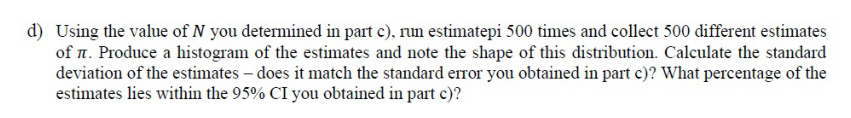

In [4]:
plt.figure(figsize = (15,15))
question = plt.imread('Question_1D_Screenshot.jpg')
plt.imshow(question)
plt.axis("off")
plt.show()

#### Answer

The standard deviation of the estimates of pi is 0.0259.
The percent of estimates for pi that lie within the 95% confidence interval identified in part C is 79.44%.


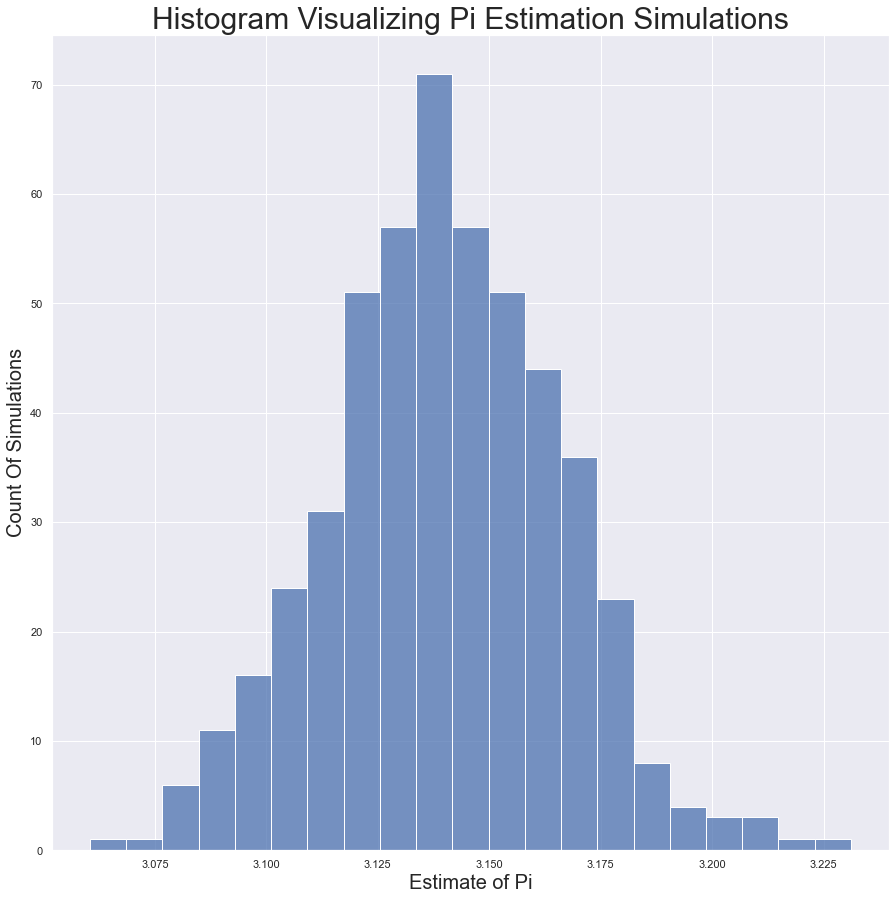

In [216]:
from statistics import stdev
from IPython.utils import io

# Let's generate 500 estimates for pi. For each of these 500 simulations, we will need to generate 4,500 (X,Y) pairs

pi_simulations_list_1D = []

with io.capture_output() as captured:
    for j in range(1, 501):
        in_circle_list = []
        pi_estimate = estimatepi(4500)
        pi_simulations_list_1D.append(pi_estimate)
    
# Let's plot a histogram that depicts the distribution of daily bonuses
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15, 15)) 

sns.histplot(pi_simulations_list_1D)

plt.xlabel("Estimate of Pi", fontsize = 20)
plt.ylabel("Count Of Simulations", fontsize = 20)
plt.title("Histogram Visualizing Pi Estimation Simulations", fontsize = 30)

# Let's calculate the standard deviation of the estimates of pi
pi_simulations_std_dev = stdev(pi_simulations_list_1D)
print(f"The standard deviation of the estimates of pi is {round(pi_simulations_std_dev,4)}.")

# Let's find the percentage of the estimates that lie within the 95% confidence interval that I calculated in part C 
# when the number of (X, Y) pairs generated was 4,500 per estimate of pi.

inside_ci_indicator_list_1D = []

def inside_ci_function(lower_bound, upper_bound):

    for i in pi_simulations_list_1D:
        if i < lower_bound:
            inside_ci_indicator_list_1D.append(0)
        if i > upper_bound:
            inside_ci_indicator_list_1D.append(0)
        else:
            inside_ci_indicator_list_1D.append(1)
        
inside_ci_function(lower_bound = 3.0643353786189333, upper_bound = 3.1614423991588447)

percent_inside_ci = round(100 * sum(inside_ci_indicator_list_1D) / len(inside_ci_indicator_list_1D), 2 )

print(f"The percent of estimates for pi that lie within the 95% confidence interval identified in part C is {percent_inside_ci}%.")


#### Question 2

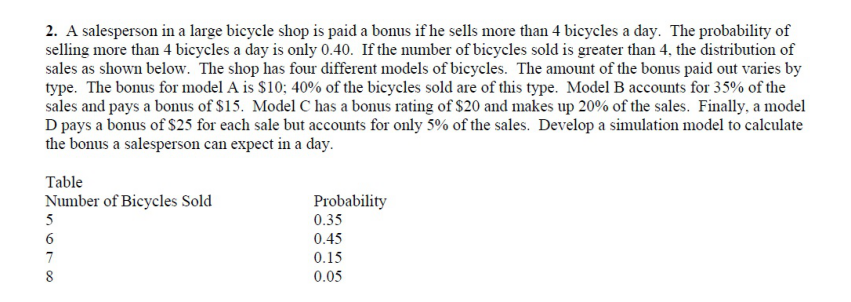

In [5]:
plt.figure(figsize = (15,15))
question = plt.imread('Question_2_Screenshot.jpg')
plt.imshow(question)
plt.axis("off")
plt.show()

#### Answer

The mean daily bonus is $11.02.


Text(0.5, 1.0, 'Histogram Visualizing Daily Bonus Simulations')

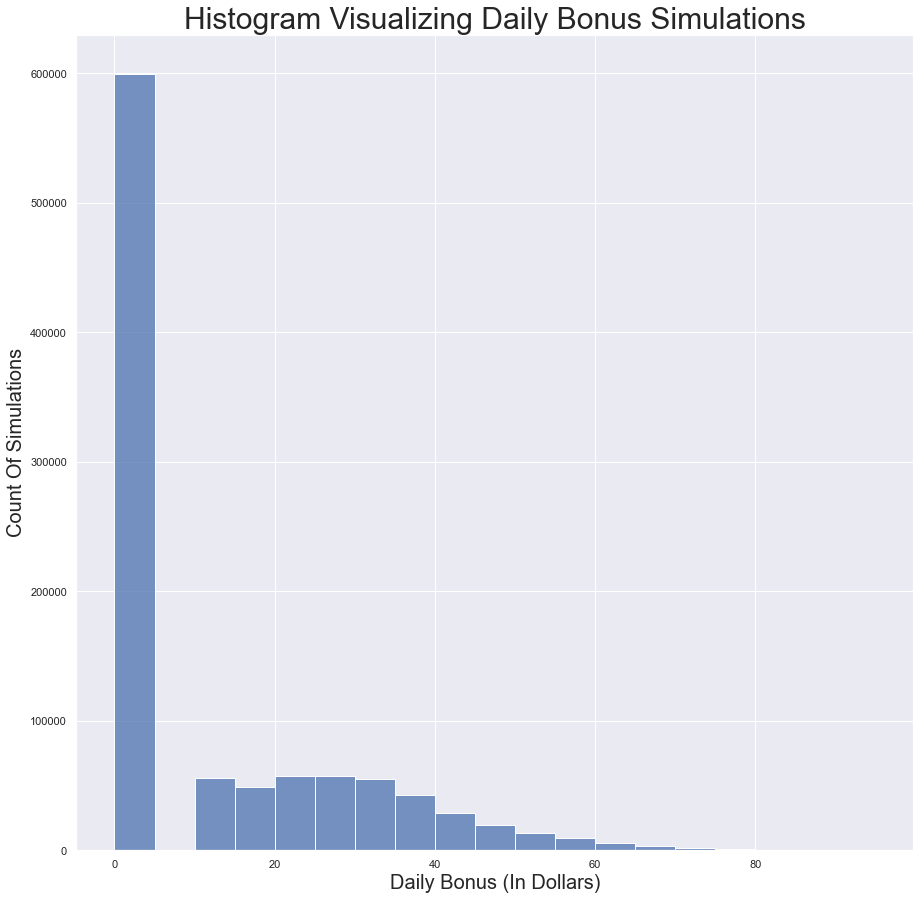

In [184]:
# Let's find the mean bonus that the employee will receive via Monte Carlo Simulation
from numpy import random
from statistics import mean, stdev
import seaborn as sns


bonus_bikes_probability_distribution = [0.6, 0.4*0.35, 0.4*0.45, 0.4*0.15, 0.4*0.05]
bike_models_probability_distribution = [0.4, 0.35, 0.2, 0.05]
model_bonus_values_list = [10, 15, 20, 25]

bonus_bikes_list = []
bonus_values_list = []

def bike_bonus_simulation(number_of_simulations):
    for k in range(1, number_of_simulations + 1):
        bonus_bikes_list.append(random.choice([0, 1, 2, 3, 4], p = bonus_bikes_probability_distribution))
        
    for i in bonus_bikes_list:
        first_bike_bonus = 0
        second_bike_bonus = 0
        third_bike_bonus = 0
        fourth_bike_bonus = 0
        
        if i >= 1:
            first_bike_bonus = random.choice(model_bonus_values_list, p = bike_models_probability_distribution)
            if i >= 2:
                second_bike_bonus = random.choice(model_bonus_values_list, p = bike_models_probability_distribution)
                if i >= 3:
                    third_bike_bonus = random.choice(model_bonus_values_list, p = bike_models_probability_distribution)
                    if i == 4:
                        fourth_bike_bonus = random.choice(model_bonus_values_list, p = bike_models_probability_distribution)
        
        bonus_values_list.append(first_bike_bonus + second_bike_bonus + third_bike_bonus + fourth_bike_bonus)

    mean_bike_bonus = sum(bonus_values_list) / number_of_simulations
            
    print(f"The mean daily bonus is ${round(mean_bike_bonus,2)}.")

bike_bonus_simulation(number_of_simulations = 1000000)

# Let's plot a histogram that depicts the distribution of daily bonuses
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15, 15)) 

sns.histplot(bonus_values_list, binwidth = 5)

plt.xlabel("Daily Bonus (In Dollars)", fontsize = 20)
plt.ylabel("Count Of Simulations", fontsize = 20)
plt.title("Histogram Visualizing Daily Bonus Simulations", fontsize = 30)


#### Question

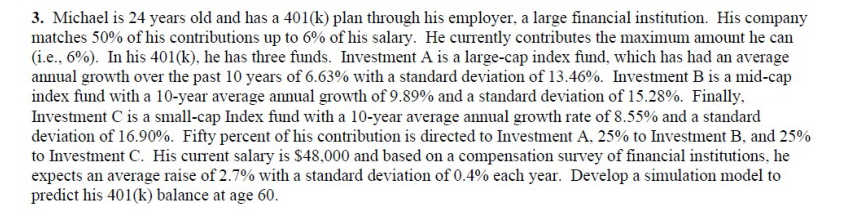

In [89]:
plt.figure(figsize = (15,15))
question = plt.imread('Question_3_Screenshot.jpg')
plt.imshow(question)
plt.axis("off")
plt.show()

#### Answer

The mean amount accrued in the 401ks in this simulation study is $1259804.38.


Text(0.5, 1.0, 'Histogram Visualizing 401k Accrual Simulations')

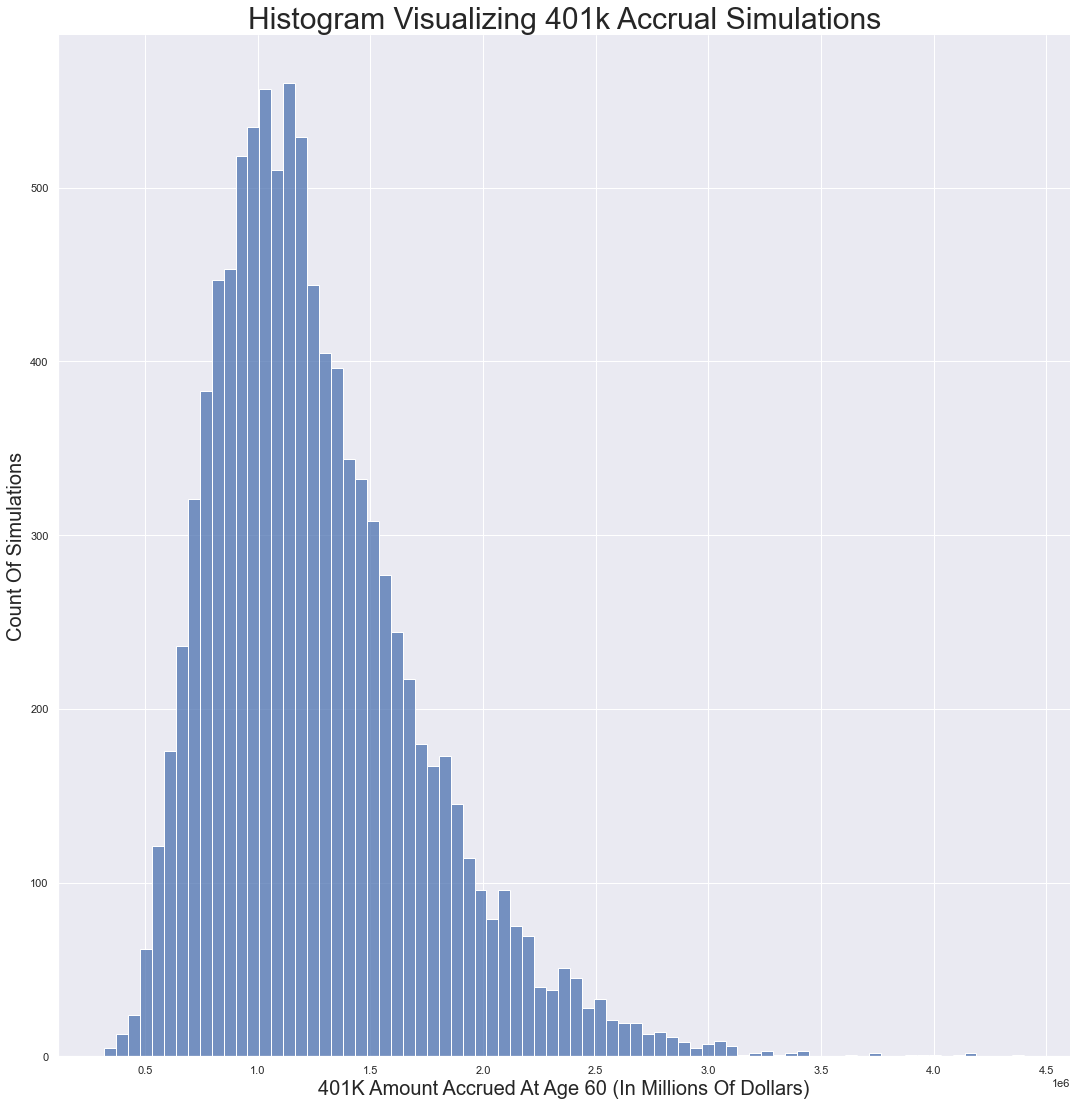

In [145]:
from numpy import random
import seaborn as sns


wealth_accrued_list = []

def retirement_account_simulator(number_of_simulations):
    
    for i in range(1, number_of_simulations + 1):
    
        # Simulate random fund annual returns and random annual raises
        investment_A_returns = list(random.normal(0.0663, 0.1346, 37))
        investment_B_returns = list(random.normal(0.0989, 0.1528, 37))
        investment_C_returns = list(random.normal(0.0855, 0.1690, 37))
        annual_raises = list(random.normal(0.027, 0.004, 37))

        # Calculate Michael's salary in each year
        annual_salaries = [48000]

        for i in range(0, 36):
            annual_salaries.append((1+annual_raises[i])*annual_salaries[i])

        # Calculate the annual contributions to each fund in each year
        annual_A_contributions = []
        annual_B_contributions = []
        annual_C_contributions = []

        for i in range(0, 37):
            annual_A_contributions.append(annual_salaries[i] * 0.06 * 1.5 * 0.5)
            annual_B_contributions.append(annual_salaries[i] * 0.06 * 1.5 * 0.25)
            annual_C_contributions.append(annual_salaries[i] * 0.06 * 1.5 * 0.25)

        # Calculate the beginning and end of year 401k values in each fund for the first year (when Michael is 24) 
        start_of_year_A = [annual_A_contributions[0]]
        start_of_year_B = [annual_B_contributions[0]]
        start_of_year_C = [annual_C_contributions[0]]

        end_of_year_A = [annual_A_contributions[0] * (1 + investment_A_returns[0])]
        end_of_year_B = [annual_B_contributions[0] * (1 + investment_B_returns[0])]
        end_of_year_C = [annual_C_contributions[0] * (1 + investment_C_returns[0])]
        end_of_year_401ks = [end_of_year_A[0] + end_of_year_B[0] + end_of_year_C[0]]

        # Calculate the beginning and end of year 401k values in each fund for the next 36 years (when Michael is 25 - 60)
        # Note that we add all of Michael's contributions at the start of the year so that they can fully accrue interest that year
        # Also, note that we rebalance the portfolio (50% in A, 25% in B, and 25% in C) at the start of each year as well
        for i in range(1, 37):
            start_of_year_A.append((end_of_year_401ks[i - 1] * 0.5) + annual_A_contributions[i])
            start_of_year_B.append((end_of_year_401ks[i - 1] * 0.25) + annual_B_contributions[i])
            start_of_year_C.append((end_of_year_401ks[i - 1] * 0.25) + annual_C_contributions[i])

            end_of_year_A.append(start_of_year_A[i] * (1 + investment_A_returns[i]))
            end_of_year_B.append(start_of_year_B[i] * (1 + investment_B_returns[i]))
            end_of_year_C.append(start_of_year_C[i] * (1 + investment_C_returns[i]))

            end_of_year_401ks.append(end_of_year_A[i] + end_of_year_B[i] + end_of_year_C[i])

        # Find the total wealth accrued in the 401K account at the end of the year when Michael is 60
        wealth_accrued_list.append(round(end_of_year_401ks[-1],2))
    
retirement_account_simulator(number_of_simulations = 10000)

mean_401k_ammount = round(mean(wealth_accrued_list),2)

print(f"The mean amount accrued in the 401ks in this simulation study is ${mean_401k_ammount}." )

sns.set_theme(style="darkgrid")


sns.displot( wealth_accrued_list, height = 15)

plt.xlabel("401K Amount Accrued At Age 60 (In Millions Of Dollars)", fontsize = 20)
plt.ylabel("Count Of Simulations", fontsize = 20)
plt.title("Histogram Visualizing 401k Accrual Simulations", fontsize = 30)
